<img src="https://github.com/alan-barzilay/NLPortugues/blob/master/imagens/logo_nlportugues.png?raw=true"  style="height:65%" align="right">


# Lista 3 - Embeddings 
**Nome:** Piero Conti Kauffmann

**Numero Usp:** 8940810









______________




O objetivo desta lista é fazer com que vocês treinem um modelo de análise de sentimentos utilizando um embedding. O modelo final será criado na seção "montando o modelo", mas até lá vamos passar pelas seguintes etapas:  
 - Importando os dados como um dataframe
 - Pré Processamento
 - Separando em teste e treino
 - Tokenizando

 
Após montar e treinar seu modelo você tambem poderá fazer uma questão extra para ganhar nota extra nessa lista, deixar de fazer esse exercicio não prejudicará sua nota.



In [1]:
import os
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.2.0'

### Importando os dados como um dataframe

Para esta lista nós utilizaremos o dataset **B2W-Reviews01** que consiste em avaliações de mais de 130k compras online no site Americanas.com e [esta disponivel no github](https://github.com/b2wdigital/b2w-reviews01) sob a licensa CC BY-NC-SA 4.01.

In [3]:
b2wCorpus = pd.read_csv("data/b2w-10k.csv")
b2wCorpus.head()

,submission_date,reviewer_id,product_id,product_name,product_brand,site_category_lv1,site_category_lv2,review_title,overall_rating,recommend_to_a_friend,review_text,reviewer_birth_year,reviewer_gender,reviewer_state,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,2018-01-01 00:11:28,d0fb1ca69422530334178f5c8624aa7a99da47907c44de...,132532965,Notebook Asus Vivobook Max X541NA-GO472T Intel...,NaN,Informática,Notebook,Bom,4,Yes,Estou contente com a compra entrega rápida o ú...,1958,F,RJ,NaN,NaN,NaN,NaN,NaN
1,2018-01-01 00:13:48,014d6dc5a10aed1ff1e6f349fb2b059a2d3de511c7538a...,22562178,Copo Acrílico Com Canudo 500ml Rocie,NaN,Utilidades Domésticas,"Copos, Taças e Canecas","Preço imbatível, ótima qualidade",4,Yes,"Por apenas R$1994.20,eu consegui comprar esse ...",1996,M,SC,NaN,NaN,NaN,NaN,NaN
2,2018-01-01 00:26:02,44f2c8edd93471926fff601274b8b2b5c4824e386ae4f2...,113022329,Panela de Pressão Elétrica Philips Walita Dail...,philips walita,Eletroportáteis,Panela Elétrica,ATENDE TODAS AS EXPECTATIVA.,4,Yes,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...,1984,M,SP,NaN,NaN,NaN,NaN,NaN
3,2018-01-01 00:35:54,ce741665c1764ab2d77539e18d0e4f66dde6213c9f0863...,113851581,Betoneira Columbus - Roma Brinquedos,roma jensen,Brinquedos,Veículos de Brinquedo,presente mais que desejado,4,Yes,MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...,1985,F,SP,NaN,NaN,NaN,NaN,NaN
4,2018-01-01 01:00:28,7d7b6b18dda804a897359276cef0ca252f9932bf4b5c8e...,131788803,"Smart TV LED 43"" LG 43UJ6525 Ultra HD 4K com C...",lg,TV e Home Theater,TV,"Sem duvidas, excelente",5,Yes,"A entrega foi no prazo, as americanas estão de...",1994,M,MG,NaN,NaN,NaN,NaN,NaN


In [4]:
b2wCorpus["review_text"]

0       Estou contente com a compra entrega rápida o ú...
1       Por apenas R$1994.20,eu consegui comprar esse ...
2       SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...
3       MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...
4       A entrega foi no prazo, as americanas estão de...
                              ...                        
9994    Celular muito rápido, com processador e armaze...
9995    achei o produto muito frágil, o material veio ...
9996    Uma porcaria pois ñ recebi ñ recomendo pra nin...
9997    Maquina excelente,super pratica. recomendo.ent...
9998    Agradeço pelo compromisso, obrigado. ,...........
Name: review_text, Length: 9999, dtype: object


### Pré-processamento
Seria util nos livrarmos das colunas que não são relevantes para o nosso problema e tambem verificar se não tem nada de esquisito nas colunas que vamos utilizar. 
Por exemplo, se fossemos utilizar a coluna "reviewer_gender" nós precisariamos nos livrar desses valores esquisitos:

In [5]:
b2wCorpus["reviewer_gender"].value_counts()

M                                                                         5033
F                                                                         4624
                                                                             1
1970                                                                         1
Ocorrência: Z-Devolução Em Andamento Ao Cd de São Paulo 22/12/17 16:12       1
Name: reviewer_gender, dtype: int64

## <font color='blue'>Questão 1 </font>

a) Selecione apenas as colunas relevantes: "review_text" e "recommend_to_a_friend". 

b) Converta a coluna "recommend_to_a_friend" de uma coluna de `str` para uma coluna de `int`:

- "Yes"-> 1
- "No" -> 0


b)

In [6]:
label_dict = {'Yes': 1, 'No': 0}
b2wCorpus['y'] = b2wCorpus['recommend_to_a_friend'].apply(lambda x: label_dict[x] if x in label_dict else np.nan)

In [7]:
b2wCorpus['y'].value_counts()

1    7451
0    2548
Name: y, dtype: int64

a)

In [8]:
X, y = b2wCorpus['review_text'].values, b2wCorpus['y'].values

### Separando em teste e treino
## <font color='blue'>Questão 2 </font>

Agora com o dataset já pré-processado, separe o em 2 partes, um conjunto de teste e um conjunto de treino. Novamente você pode utilizar a função [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) do Scikit-Learn como na lista passada.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=8940810)

### Tokenizando

Para alimentarmos os reviews a camada de embedding nós precisamos quebrar cada review em uma serie de tokens. Existem diversas maneiras de se realizar isso e poderiamos até mesmo usar outras bibliotecas como o spaCy. 

Por exemplo, o objeto [`Tokenizer`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer) oferece um método `tokenize` para quebrar as palavras em tokens individuais ao mesmo tempo que filtra caracteres indesejados (por default os caracteres filtrados são: !"#$\%&()*+,-./:;<=>?@[\\]^_\`{|}~\t\n).


Para essa lista utilizaremos a camada [`TextVectorization`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/TextVectorization) para automaticamente passar os reviews para caixa-baixa, extrair caracteres especiais e tokenizar as palavras de maneira a serem passadas para a camada de embedding. Ao tornarmos a etapa de tokenização uma camada de rede neural nós podemos incluir esse processamento dos reviews no proprio modelo.


## <font color='blue'>Questão 3 </font>
Utilizando a camada `TextVectorization` tokenize os inputs.
Declare a camada e então chame a função `adapt()` para adequar o seu vocabulário aos reviews.

Não se esqueça de se certificar que todas os reviews tenham o mesmo comprimento, seja por meio do uso de padding, truncamento ou uma mistura dos dois. Plotamos um histograma do comprimento dos reviews para lhe auxiliar nessa decisão.

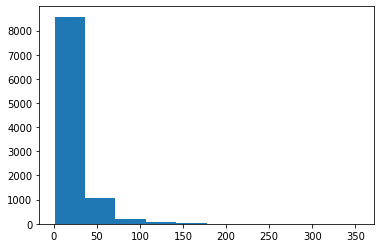

In [11]:
plt.hist([len(linha.split()) for linha in b2wCorpus["review_text"]])
plt.show()

Resposta

In [12]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [13]:
text_vectorizer = TextVectorization(output_sequence_length=100, output_mode='int')

In [14]:
text_vectorizer.adapt(Xtrain)

In [15]:
vocab = text_vectorizer.get_vocabulary()

### Montando o modelo

Agora vamos juntar a camada do tokenizador a nossa camada [Embedding](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding) e definir o resto de nosso modelo.

##  <font color='blue'>Questão 3 </font>

Defina seu modelo.

Como analise de sentimentos pode ser visto como um problema de classificação, é interessante também registrar algumas métricas como acurácia `metrics=["acc"]` .

Seu modelo deve começar com a seguinte estrutura:
 - Camada de Input
 - Camada de Tokenização
 - Camada de Embedding
 
Já definimos as camadas seguintes da rede por você.
 
Atenção a dimensão do input da camada de embedding, lembre se que < OOV > e < PAD > possuem seus próprios tokens.


In [16]:
from tensorflow import keras
from tensorflow.keras import layers

In [17]:
EMB_DIM = 128

In [24]:
model = tf.keras.Sequential([    
    ############ Seu código aqui##################
    
    layers.Input(shape=(1,), dtype=tf.string),
    
    text_vectorizer,
    
    layers.Embedding(len(vocab) + 2, EMB_DIM),
    
    ##############################################
    # Conv1D + global max pooling
    layers.Conv1D(128, 7, padding='valid', activation='relu', strides=3),
    layers.Conv1D(128, 7, padding='valid', activation='relu', strides=3),
    layers.GlobalMaxPooling1D(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid'),
])


### Treinando e avaliando seu modelo

##  <font color='blue'>Questão 4 </font>

Com seu modelo definido, treine e avalie sua performance no conjunto de testes.



In [25]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
model.fit(Xtrain, ytrain, epochs=32)

Epoch 1/32
250/250 [==============================] - 4s 17ms/step - loss: 0.3754 - accuracy: 0.8409
Epoch 2/32
250/250 [==============================] - 4s 17ms/step - loss: 0.1573 - accuracy: 0.9469
Epoch 3/32
250/250 [==============================] - 4s 17ms/step - loss: 0.0580 - accuracy: 0.9824
Epoch 4/32
250/250 [==============================] - 4s 16ms/step - loss: 0.0242 - accuracy: 0.9930
Epoch 5/32
250/250 [==============================] - 4s 16ms/step - loss: 0.0136 - accuracy: 0.9957
Epoch 6/32
250/250 [==============================] - 4s 17ms/step - loss: 0.0057 - accuracy: 0.9985
Epoch 7/32
250/250 [==============================] - 4s 17ms/step - loss: 0.0067 - accuracy: 0.9976
Epoch 8/32
250/250 [==============================] - 4s 17ms/step - loss: 0.0055 - accuracy: 0.9980
Epoch 9/32
250/250 [==============================] - 4s 17ms/step - loss: 0.0112 - accuracy: 0.9969
Epoch 10/32
250/250 [==============================] - 4s 18ms/step - loss: 0.0087 - accura

Obtém performance no conjunto de testes

In [27]:
from sklearn.metrics import confusion_matrix, classification_report

In [28]:
pred_test = model.predict(Xtest)

In [29]:
print(classification_report(ytest, pred_test > 0.5))

              precision    recall  f1-score   support

           0       0.75      0.68      0.72       545
           1       0.89      0.92      0.90      1455

    accuracy                           0.85      2000
   macro avg       0.82      0.80      0.81      2000
weighted avg       0.85      0.85      0.85      2000



Obtivemos acurácia e F1 ponderado de 85% para os dados de teste.

##  <font color='green'>Questão Extra </font>
Valendo pontos extras, você não vai ser prejudicado se deixar de faze-la

### Vizualizando o embedding
Agora que temos um embedding treinado em nossa tarefa de analise de sentimentos, podemos tentar vizualisar este embedding. O [embedding projector](https://projector.tensorflow.org/) nos permite visualiza-los de maneira mais intuitiva.

Para carregar seu próprio embedding você precisará fornecer 2 arquivos, um com os embeddings propriamente ditos e outro com os métadados (no nosso caso, um string que representa a palavra). 

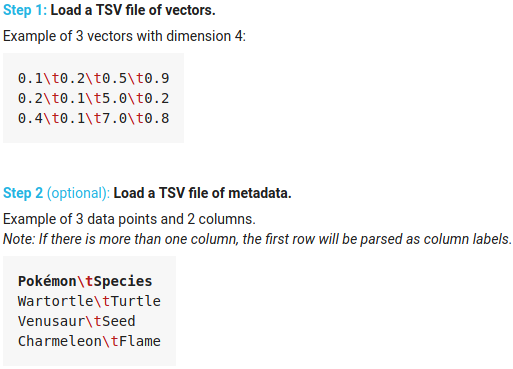

Esse [guia](https://www.tensorflow.org/tensorboard/tensorboard_projector_plugin) pode ser util para entender melhor como extrair essas informações.

In [91]:
# Exporta vetores (remove os dois primeiros tokens <PAD> e <UNK>)
embedding_matrix = model.layers[1].get_weights()[0][2:,]

# Obtém vocabulário
word_tokens = [str(x, encoding='utf-8') for x in text_vectorizer.get_vocabulary()]

# Verifica se existe um vetor p/ cada palavra no vocabulário
assert embedding_matrix.shape[0] == len(word_tokens)

# Cria tsv com vetores
np.savetxt('./embeddings.tsv', embedding_matrix, delimiter='\t')

# Cria tsv com vocabulário
np.savetxt('./vocab.tsv', word_tokens, fmt='%s', delimiter='\t')

In [92]:
!head ./vocab.tsv

o
e
de
a
produto
que
não
muito
do
é


Procure por palavras com conotações tradicionalmente positivas e negativas, elas estão proximas ou distantes?
Usando a visualização PCA, você consegue notar alguma característica interessante sobre como as palavras estão distribuidas nesse espaço?


**<font color='red'> Sua resposta aqui </font>**

A palavra 'ruim' e os 100 vizinhos mais próximos em vermelho

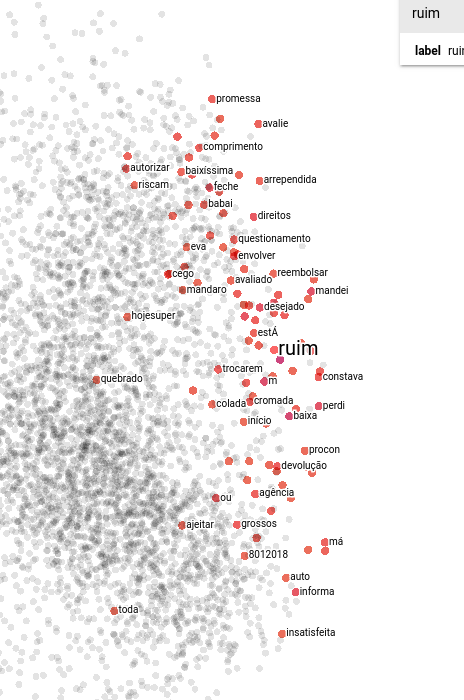

A palavra 'excelente' e os 100 vizinhos mais próximos em vermelho

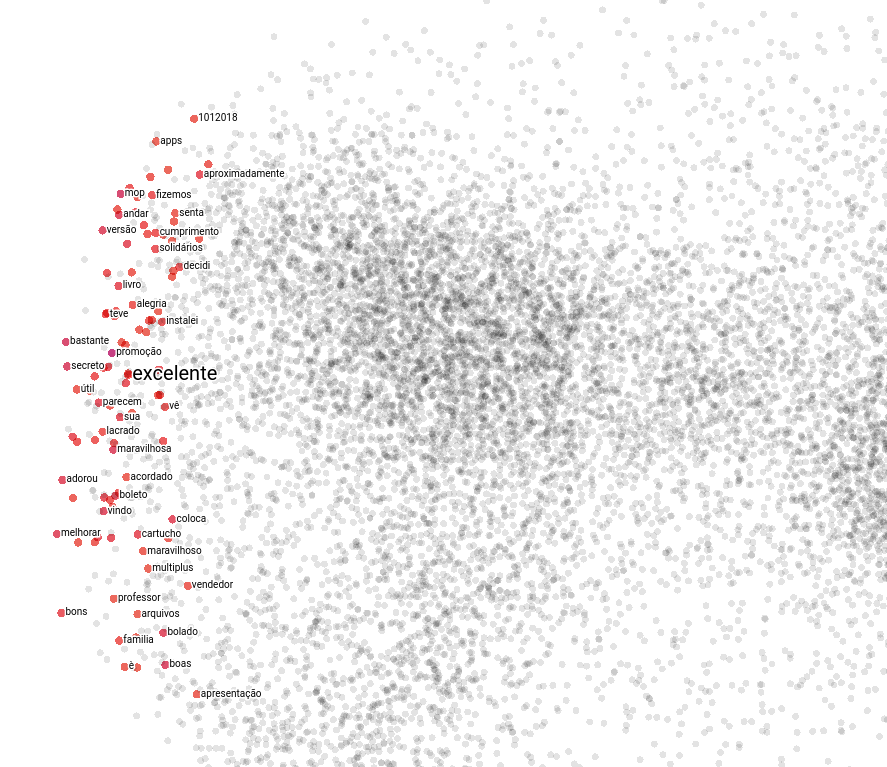

Parecem haver dois clusters bem definidos. 

Apesar de muitas palavras não relacionadas ao problema estarem misturadas, as palavras chave relacionadas a clientes que gostaram do produto estão no cluster da esquerda enquanto as palavras referentes à críticas estão do lado direito.

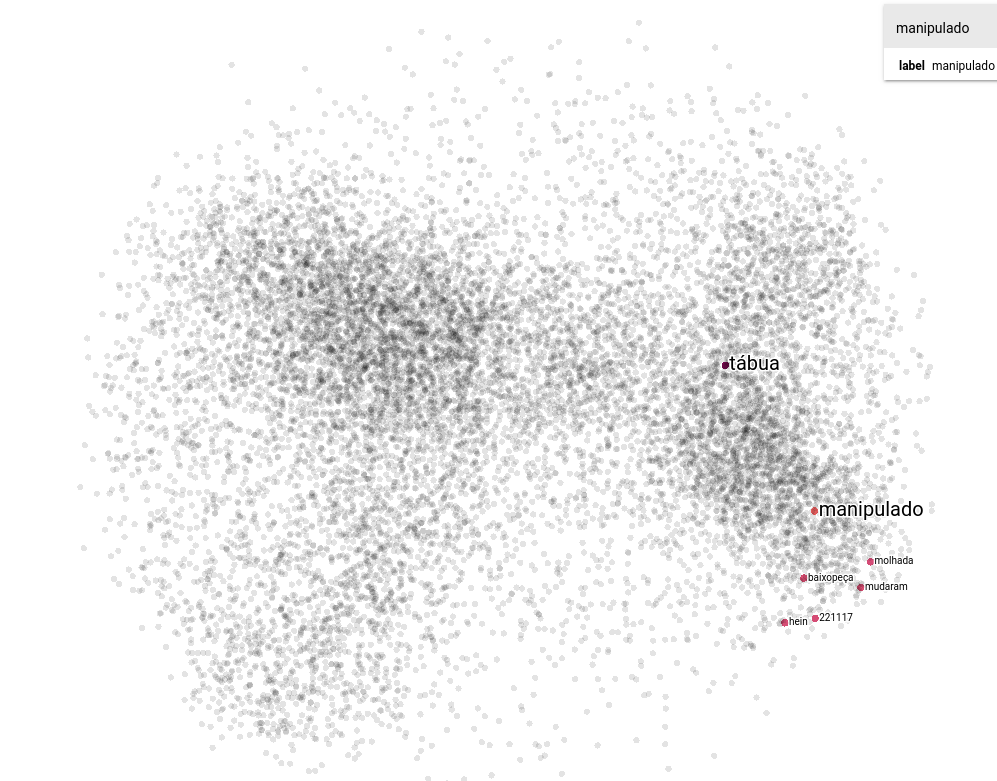